<a href="https://colab.research.google.com/github/dariuscruceru21/AN2/blob/main/ex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#  1.3 Roboter-Navigation


# Nun schauen wir uns an, wie die Suchalgorithmen benutzt werden können, um einen Roboter kürzeste Wege finden zu lassen.

# Wir nehmen an, dass der Roboter eine Karte der Umgebung hat, und weiß, an welchem Punkt er sich befindet. Um das Ganze einfacher zu machen, nehmen wir außerdem an, dass die Karte ein einfaches 2D-Raster von Zellen ist. Der Roboter kann jede Zelle entweder betreten (`0`) oder die Zelle ist blockiert (`1`).
# In unserer Implementierung ist die Karte eine Matrix von Integers. Zusätzlich gibt es Convenience-Funktionen, um die Nachbarn einer Zelle zu erhalten, und die Distanz zwischen zwei Zellen auszurechnen.

import numpy as np
import math

#Euclidean distance
def distance(x, y):
    return math.sqrt(((x[0]-y[0])**2 + (x[1]-y[1])**2))


class Map:
    def __init__(self,m : np.ndarray) -> None:
        self.m = m
    def neighbors(self,cell):
        nrow,ncol = self.m.shape
        x,y = cell
        nb = []
        if x>0:
            if self.m[x-1,y]==0:
                nb = nb + [(x-1,y)]
        if x<(nrow-1):
            if self.m[x+1,y]==0:
                nb = nb + [(x+1,y)]
        if y>0:
            if self.m[x,y-1]==0:
                nb = nb + [(x,y-1)]
        if y<(ncol-1):
            if self.m[x,y+1]==0:
                nb = nb + [(x,y+1)]
        return nb



m = np.array([[0,1,0,0,0,0,0],[0,1,0,1,0,0,1],[0,1,0,1,0,1,0],[0,1,0,1,0,0,0],[0,0,0,1,1,0,0],[0,0,0,1,1,0,0]])
mm = Map(m)
mm.neighbors((4,1))

## Aufgabe

#  Implementieren Sie Tiefensuche, um einen Weg vom Start zum Ziel zu finden. Als Ausgabe soll ein Dictionary ausgegeben werden, dass für jeden (besuchten) Knoten den Vorgänger angibt.
#  Implementieren Sie eine Funktion `make_path(came_from,start,goal)`, die ein solches Dictionary in einen Weg vom Start zum Ziel (als Liste von Zellen) umwandelt. Ändern Sie Ihre Implementierung der Tiefensuche entsprechend ab, sodass direkt der Pfad ausgegeben wird.
#  Implementieren Sie den A*-Algorithmus, um von einem gegebenen Start den kürzesten Weg zum Ziel zu finden. Auch hier soll der Pfad als Liste von Zellen ausgegeben werden.
#  Testen Sie die Implementierungen mit der Karte `mm`, indem Sie den Weg von `(0,0)` zu `(5,6)` mit beiden Algorithmen ausrechnen.

# Die Implementierungen eines Stacks und einer Priority Queue (Prioritätswarteschlange) sind bereits gegeben und können von Ihnen verwendet werden.
import heapq

class PriorityQueue:
    def __init__(self):
        self.elements = []

    def empty(self):
        return len(self.elements) == 0

    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))

    def get(self):
        return heapq.heappop(self.elements)[1]

class Stack:
    def __init__(self):
        self.elements = []

    def empty(self):
        return len(self.elements) == 0

    def put(self, x):
        self.elements.append(x)

    def get(self):
        return self.elements.pop()

def dfs(map,start,goal):
    stack = Stack()
    stack.put(start)
    came_from = {start: None}
    while not stack.empty():
        current = stack.get()
        if current == goal:
            return make_path(came_from,start,goal)
        for neighbor in map.neighbors(current):
            if neighbor not in came_from:
                stack.put(neighbor)
                came_from[neighbor] = current
    return None


def make_path(came_from,start,goal):
    current = goal
    path = []
    while current != start:
        path.append(current)
        current = came_from[current]
    path.append(start)
    path.reverse()
    return path

def astar(map : Map,start,goal):
    open_list = PriorityQueue()
    open_list.put(start,0)
    came_from = {start: None}
    cost_so_far = {start: 0}

    while not open_list.empty():
        current = open_list.get()

        if current == goal:
            return make_path(came_from,start,goal)

        for neighbor in map.neighbors(current):
            new_cost = cost_so_far[current] + distance(current,neighbor)
            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                priority = new_cost + distance(neighbor,goal)
                open_list.put(neighbor,priority)
                came_from[neighbor] = current
    return None



#TEST
start = (0,0)
goal = (5,6)

path_dfs = dfs(mm,start,goal)
path_astar = astar(mm,start,goal)

print("DFS:",path_dfs)
print("A*:",path_astar)

DFS: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (3, 2), (2, 2), (1, 2), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4), (3, 5), (3, 6), (4, 6), (5, 6)]
A*: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (3, 2), (2, 2), (1, 2), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4), (3, 5), (4, 5), (4, 6), (5, 6)]


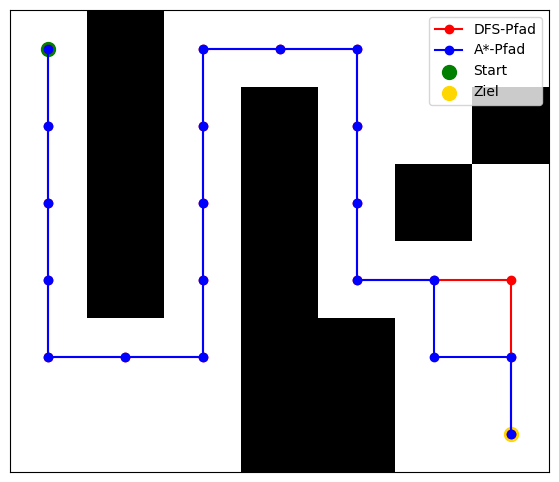

In [3]:
import matplotlib.pyplot as plt

def plot_path(map_matrix, path_dfs, path_astar):
    nrows, ncols = map_matrix.shape
    fig, ax = plt.subplots(figsize=(ncols, nrows))

    # Zeichne die Karte
    ax.imshow(map_matrix, cmap="gray_r")  # 0 = Weiß (begehbar), 1 = Schwarz (blockiert)

    # DFS-Pfad (rot)
    if path_dfs:
        dfs_x, dfs_y = zip(*path_dfs)
        ax.plot(dfs_y, dfs_x, marker="o", color="red", label="DFS-Pfad")

    # A*-Pfad (blau)
    if path_astar:
        astar_x, astar_y = zip(*path_astar)
        ax.plot(astar_y, astar_x, marker="o", color="blue", label="A*-Pfad")

    # Start- und Zielpunkte markieren
    ax.scatter(path_dfs[0][1], path_dfs[0][0], color="green", s=100, label="Start")
    ax.scatter(path_dfs[-1][1], path_dfs[-1][0], color="gold", s=100, label="Ziel")

    # Achsen entfernen
    ax.set_xticks([])
    ax.set_yticks([])
    ax.legend()
    plt.show()

# Karte als numpy array
map_matrix = np.array([[0,1,0,0,0,0,0],
                       [0,1,0,1,0,0,1],
                       [0,1,0,1,0,1,0],
                       [0,1,0,1,0,0,0],
                       [0,0,0,1,1,0,0],
                       [0,0,0,1,1,0,0]])

# Pfade berechnen
start = (0,0)
goal = (5,6)
path_dfs = dfs(mm, start, goal)
path_astar = astar(mm, start, goal)

# Visualisierung aufrufen
plot_path(map_matrix, path_dfs, path_astar)
